#Assignment 3 & 4 - Atharva Date-B22AI045

##Question 1

###Task 1

In [480]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [481]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [482]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [483]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [485]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [486]:
print(round(df.groupby(['Pclass','Sex','Survived'])['Age'].agg(['mean']),0))

                        mean
Pclass Sex    Survived      
1      female 0         26.0
              1         35.0
       male   0         45.0
              1         36.0
2      female 0         36.0
              1         28.0
       male   0         33.0
              1         16.0
3      female 0         24.0
              1         19.0
       male   0         27.0
              1         22.0


In [487]:
# I have further tried to make the mean more accurate by calculaing mean based of sex, Pclass, survived or not
df["Age"] = df["Age"].fillna(-1)

for data_index in range(df.shape[0]):
  if df["Age"][data_index] == -1:
    if df["Survived"][data_index] == 0:
      if ((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 1)):
        df["Age"][data_index] = 26
      elif((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 2)):
        df["Age"][data_index] = 36
      elif((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 3)):
        df["Age"][data_index] = 24
      elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 1)):
        df["Age"][data_index] = 45
      elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 2)):
        df["Age"][data_index] = 33
      elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 3)):
        df["Age"][data_index] = 27
    else:
      if ((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 1)):
        df["Age"][data_index] = 35
      elif((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 2)):
        df["Age"][data_index] = 28
      elif((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 3)):
        df["Age"][data_index] = 19
      elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 1)):
        df["Age"][data_index] = 36
      elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 2)):
        df["Age"][data_index] = 16
      elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 3)):
        df["Age"][data_index] = 22

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [488]:
df = df.drop(columns = ["Cabin"])

In [489]:
df.dropna(inplace = True)

In [490]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [491]:
df.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)

In [492]:
from sklearn.model_selection import train_test_split

In [493]:
def encode_embarked(column):

  for data in column:
    if data == 'S' or data=='s':
      column[column.index(data)] = 0
    elif data == 'C' or data == 'c':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column
df["Embarked"] = encode_embarked(list(df["Embarked"]))

In [494]:
df["Sex"].replace("female", 0, inplace = True)
df["Sex"].replace("male", 1, inplace = True)

In [495]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.263408,0.524184,0.382452,32.096681,0.362205
std,0.486260,0.834700,0.477538,13.355708,1.103705,0.806761,49.697504,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [496]:
y = df['Survived']
X = df.drop(columns=['Survived'])
X,y

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0         3    1  22.0      1      0   7.2500         0
 1         1    0  38.0      1      0  71.2833         1
 2         3    0  26.0      0      0   7.9250         0
 3         1    0  35.0      1      0  53.1000         0
 4         3    1  35.0      0      0   8.0500         0
 ..      ...  ...   ...    ...    ...      ...       ...
 886       2    1  27.0      0      0  13.0000         0
 887       1    0  19.0      0      0  30.0000         0
 888       3    0  24.0      1      2  23.4500         0
 889       1    1  26.0      0      0  30.0000         1
 890       3    1  32.0      0      0   7.7500         2
 
 [889 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64)

In [497]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,train_size = 0.7, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size = 2/3, random_state = 42)

In [498]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (622, 7)
Shape of y_train: (622,)
Shape of X_test: (89, 7)
Shape of y_test: (89,)
Shape of X_valid: (178, 7)
Shape of y_valid: (178,)


In [499]:
np.array(X_train)[:,1]

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

###Task 2

In [500]:
import numpy as np

def entropy(y):
    data = y
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)

    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

def information_gain(y, X_column, threshold):
    parent_entropy = entropy(np.array(y))
    left_idxs, right_idxs = _split(np.array(X_column), threshold)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
        return 0
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

    ig = parent_entropy - child_entropy
    return ig

def _split(X_column, split_thresh):
    left_idxs = np.argwhere(X_column <= split_thresh).flatten()
    right_idxs = np.argwhere(X_column > split_thresh).flatten()
    return left_idxs, right_idxs


###Task 3

In [501]:
def conTocat(self, X, y, feature):
    unique_values = sorted(np.unique(X[feature]))

    best_split = None
    best_gain = 0

    for value in unique_values:
        left_idxs, right_idxs = self._split(X[feature], value)

        left_split = y[left_idxs]
        right_split = y[right_idxs]

        gain = information_gain(y, X[feature], value)

        if gain > best_gain:
            best_gain = gain
            best_split = value

    return best_split

###Task 4 (train function is already applied in class during fitting)

In [502]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def entropy(self, y):
        data = y
        unique_values, counts = np.unique(data, return_counts=True)
        probabilities = counts / len(data)

        entropy = -np.sum(probabilities * np.log2(probabilities))

        return entropy
    def __init__(self, min_sample_split=2, max_depth=6, n_features=None):
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1]
        y = np.array(y)  # convert y to numpy array
        self.root = self.grow_tree(X, y)

    def grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_sample_split):
            leaf_value = self.most_common_label(y) if len(y) != 0 else 0
            return Node(value=leaf_value)

        feat_idx = np.random.choice(n_feats, self.n_features, replace=False)
        best_thresh, best_features = self.best_split(X, y, feat_idx)

        left_idxs, right_idxs = self._split(np.array(X)[:, best_features], best_thresh)
        left_child = self.grow_tree(np.array(X)[left_idxs, :], y[left_idxs], depth + 1)
        right_child = self.grow_tree(np.array(X)[right_idxs, :], y[right_idxs], depth + 1)

        return Node(feature=best_features, threshold=best_thresh, left=left_child, right=right_child)
    def information_gain(self, y, X_column, threshold):
      parent_entropy = self.entropy(np.array(y))
      left_idxs, right_idxs = self._split(np.array(X_column), threshold)
        
      if len(left_idxs) == 0 or len(right_idxs) == 0:
          return 0
      n = len(y)
      n_l, n_r = len(left_idxs), len(right_idxs)
      e_l, e_r = self.entropy(y[left_idxs]), self.entropy(y[right_idxs])
      child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

      ig = parent_entropy - child_entropy
      return ig
    def grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_sample_split):
            leaf_value = self.most_common_label(y) if len(y)!=0 else None
            if(leaf_value is None):return None
            return Node(value=leaf_value)

        feat_idx = np.random.choice(n_feats, self.n_features, replace=False)
        best_thresh, best_features = self.best_split(X, y, feat_idx)
        left_idxs, right_idxs = self._split(np.array(X)[:, best_features], best_thresh)
        left_child = self.grow_tree(np.array(X)[left_idxs, :], y[left_idxs], depth + 1)
        right_child = self.grow_tree(np.array(X)[right_idxs, :], y[right_idxs], depth + 1)

        return Node(feature=best_features, threshold=best_thresh, left=left_child, right=right_child)

    def best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thr = None, None
        for feat_idx in feat_idxs:
            X_column = np.array(X)[:, feat_idx]
            threshholds = np.unique(X_column)

            for thr in threshholds:
                gain = self.information_gain(y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thr = thr
        return split_thr, split_idx

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def most_common_label(self, y):
        counter = Counter(y)
        if counter is None:
          return None;
        return counter.most_common(1)[0][0]

    def predict(self, X):
        X = np.array(X)
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        left_child = node.left
        right_child = node.right

        if x[node.feature] <= node.threshold and left_child is not None:
            return self._traverse_tree(x, left_child)
        elif x[node.feature] > node.threshold and right_child is not None:
            return self._traverse_tree(x, right_child)
        else:
            return node.value

In [503]:
def train_decision_tree(X_train, y_train):
    dt_model = DecisionTree()
    dt_model.fit(X_train, y_train)
    return dt_model
trained_dt_model = train_decision_tree(X_train, y_train)


###Task 5

In [504]:
def infer(X_row):
  return(trained_dt_model.predict(X_row[np.newaxis, :]))
result = infer(np.array(X_test)[0])[0]
result, np.array(y_test)[0]

(0, 0)

###Task 6

In [505]:
predictions = trained_dt_model.predict(X_test)
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred)/len(y_pred)

acc = accuracy(y_test, predictions)
print("Test accuracy = ")
print(acc)
prediction2 = trained_dt_model.predict(X_valid)
acc2 = accuracy(y_valid, prediction2)
print('\nValidation accuracy =')
print(acc2)
prediction_train = trained_dt_model.predict(X_train)
acc1 = accuracy(y_train, prediction_train)
print("\nTrain accuracy =")
print(acc1)

Test accuracy = 
0.7865168539325843

Validation accuracy =
0.8033707865168539

Train accuracy =
0.9035369774919614


###Task 7

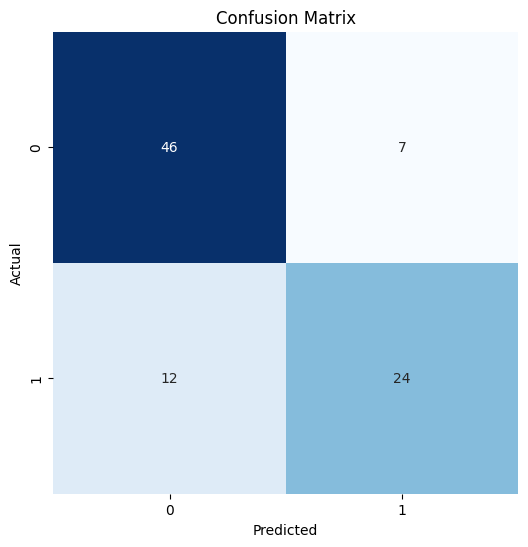

In [506]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


###Task 8

In [507]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.7855
Recall: 0.7865
F1-score: 0.7834


##Question 2

###Task 1

In [508]:
data = pd.read_csv("https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv")
print(data.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


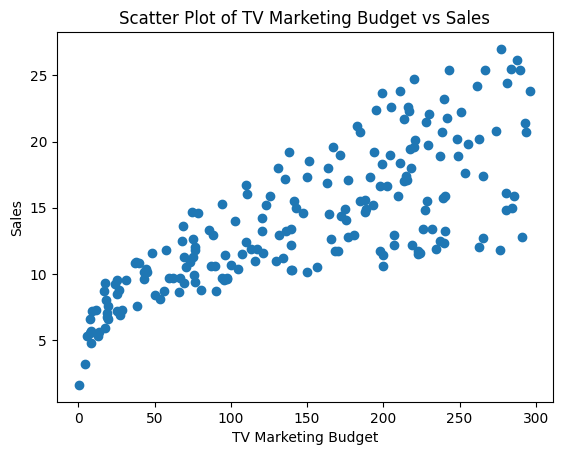

In [509]:

plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV Marketing Budget vs Sales')
plt.show()


In [510]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


(None,
                TV       Sales
 count  200.000000  200.000000
 mean   147.042500   14.022500
 std     85.854236    5.217457
 min      0.700000    1.600000
 25%     74.375000   10.375000
 50%    149.750000   12.900000
 75%    218.825000   17.400000
 max    296.400000   27.000000)

In [511]:
print("Mean TV Marketing Budget:", data['TV'].mean())
print("Standard Deviation of TV Marketing Budget:", data['TV'].std())
print("Mean Sales:", data['Sales'].mean())
print("Standard Deviation of Sales:", data['Sales'].std())

Mean TV Marketing Budget: 147.0425
Standard Deviation of TV Marketing Budget: 85.85423631490808
Mean Sales: 14.0225
Standard Deviation of Sales: 5.217456565710478


###Task 2

In [512]:
print(data.isnull().sum())

TV       0
Sales    0
dtype: int64


In [513]:
def z_transform(d):
    l=[]
    for i in d:
        l.append((i-d.mean())/(d.std()))
    return l
data['Sales'] = np.array(z_transform(data['Sales']))
data['TV'] = np.array(z_transform(data['TV']))
data.head()

,TV,Sales
0,0.967425,1.548168
1,-1.194379,-0.694304
2,-1.512360,-0.905135
3,0.051919,0.858177
4,0.393196,-0.215143


In [514]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data['TV'],data['Sales'],train_size = 0.8, random_state = 42)


In [515]:
X_test1.shape, y_train1.shape

((40,), (160,))

###Task 3

In [516]:
def hypothesis(X, w, b):
    return np.dot(X, w)+b

def cost_function(X, y, w, b):
    m = len(y)
    predictions = hypothesis(X, w, b)
    cost = (1/m) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, lr, iterations):
    m = X.shape[0]
    if(np.array(X).ndim == 1):
      w = 0
    else:
      w = np.zeros(X.shape[1])
    cost_history = np.zeros(iterations)
    b = 0

    for i in range(iterations):
        predictions = hypothesis(X, w, b)
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        w = w - lr * dw
        b = b - lr * db
        cost_history[i] = cost_function(X, y, w, b)

    return w, cost_history, b


learning_rate = 0.01
iterations = 1000

w, cost_history, b = gradient_descent(X_train1, y_train1, learning_rate, iterations)

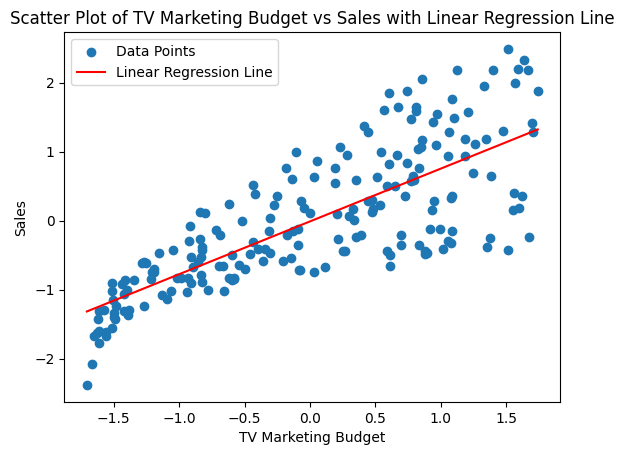

In [517]:
plt.scatter(data['TV'], data['Sales'], label='Data Points')
line_x = np.linspace(data['TV'].min(), data['TV'].max(), 100)
line_y = w * line_x + b

plt.plot(line_x, line_y, color='red', label='Linear Regression Line')

plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV Marketing Budget vs Sales with Linear Regression Line')
plt.legend()

plt.show()


###Task 4

In [518]:
predictions = hypothesis(X_test1, w, b)

mse = np.mean(np.square(predictions - y_test1))
mae = np.mean(np.abs(predictions - y_test1))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.3748766576859965
Mean Absolute Error: 0.46852221306135605


In [519]:
print("Final Weights and bias :", w, b)

Final Weights and bias : 0.7656041965343172 -0.011679112425964882


In [520]:
print("Final Cost:", cost_function(X_train1, y_train1, w, b))

Final Cost: 0.38952530670467667


##Question 3

###Task 1

In [521]:
import pandas as pd

# Load the data from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [522]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

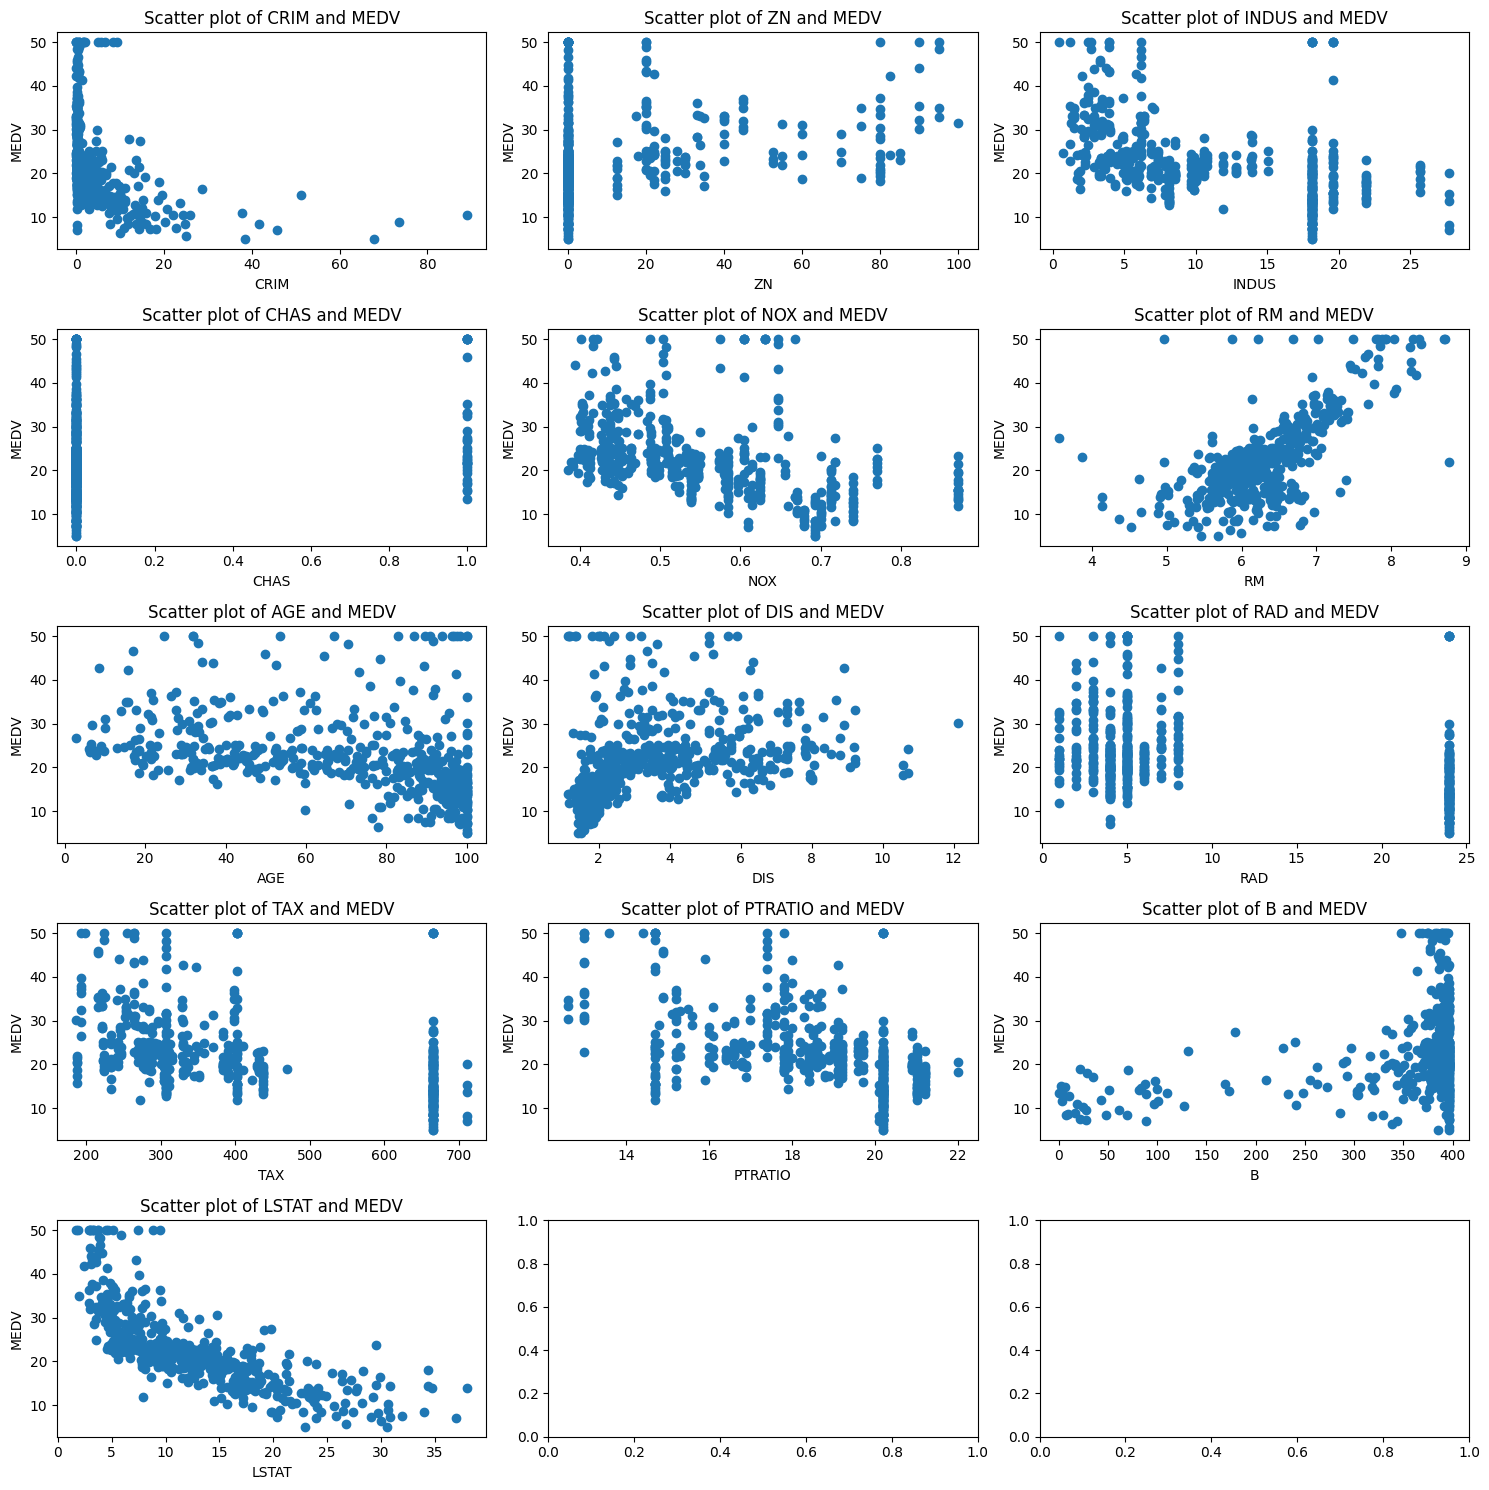

In [523]:
num_cols = 3
num_rows = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for idx, i in enumerate(column_names):
    if i == 'MEDV':
        continue

    # Calculate the current row and column indices
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Scatter plot on the current subplot
    axes[row_idx, col_idx].scatter(data[i], data['MEDV'])
    axes[row_idx, col_idx].set_xlabel(i)
    axes[row_idx, col_idx].set_ylabel('MEDV')
    axes[row_idx, col_idx].set_title(f'Scatter plot of {i} and MEDV')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

###Task 2

In [524]:
for i in column_names:
    print(f"Mean of {i} is {data[i].mean()}")
    print(f"STD of {i} is {data[i].std()}")

Mean of CRIM is 3.613523557312254
STD of CRIM is 8.60154510533249
Mean of ZN is 11.363636363636363
STD of ZN is 23.32245299451514
Mean of INDUS is 11.13677865612648
STD of INDUS is 6.860352940897585
Mean of CHAS is 0.0691699604743083
STD of CHAS is 0.25399404134041037
Mean of NOX is 0.5546950592885376
STD of NOX is 0.11587767566755595
Mean of RM is 6.284634387351779
STD of RM is 0.7026171434153233
Mean of AGE is 68.57490118577076
STD of AGE is 28.148861406903617
Mean of DIS is 3.795042687747036
STD of DIS is 2.105710126627611
Mean of RAD is 9.549407114624506
STD of RAD is 8.707259384239366
Mean of TAX is 408.2371541501976
STD of TAX is 168.53711605495903
Mean of PTRATIO is 18.455533596837945
STD of PTRATIO is 2.1649455237144406
Mean of B is 356.6740316205534
STD of B is 91.29486438415783
Mean of LSTAT is 12.653063241106722
STD of LSTAT is 7.141061511348571
Mean of MEDV is 22.532806324110677
STD of MEDV is 9.197104087379818


In [525]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [526]:
for i in column_names:
  data[i] = np.array(z_transform(data[i]))
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [527]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['MEDV']),data['MEDV'],train_size = 0.8, random_state = 42)

###Task 3

In [528]:
learning_rate = 0.01
iterations = 10000

w1, cost_history1, b1 = gradient_descent(X_train, y_train, learning_rate, iterations)

In [539]:
predictions = hypothesis(X_test, w1, b1)

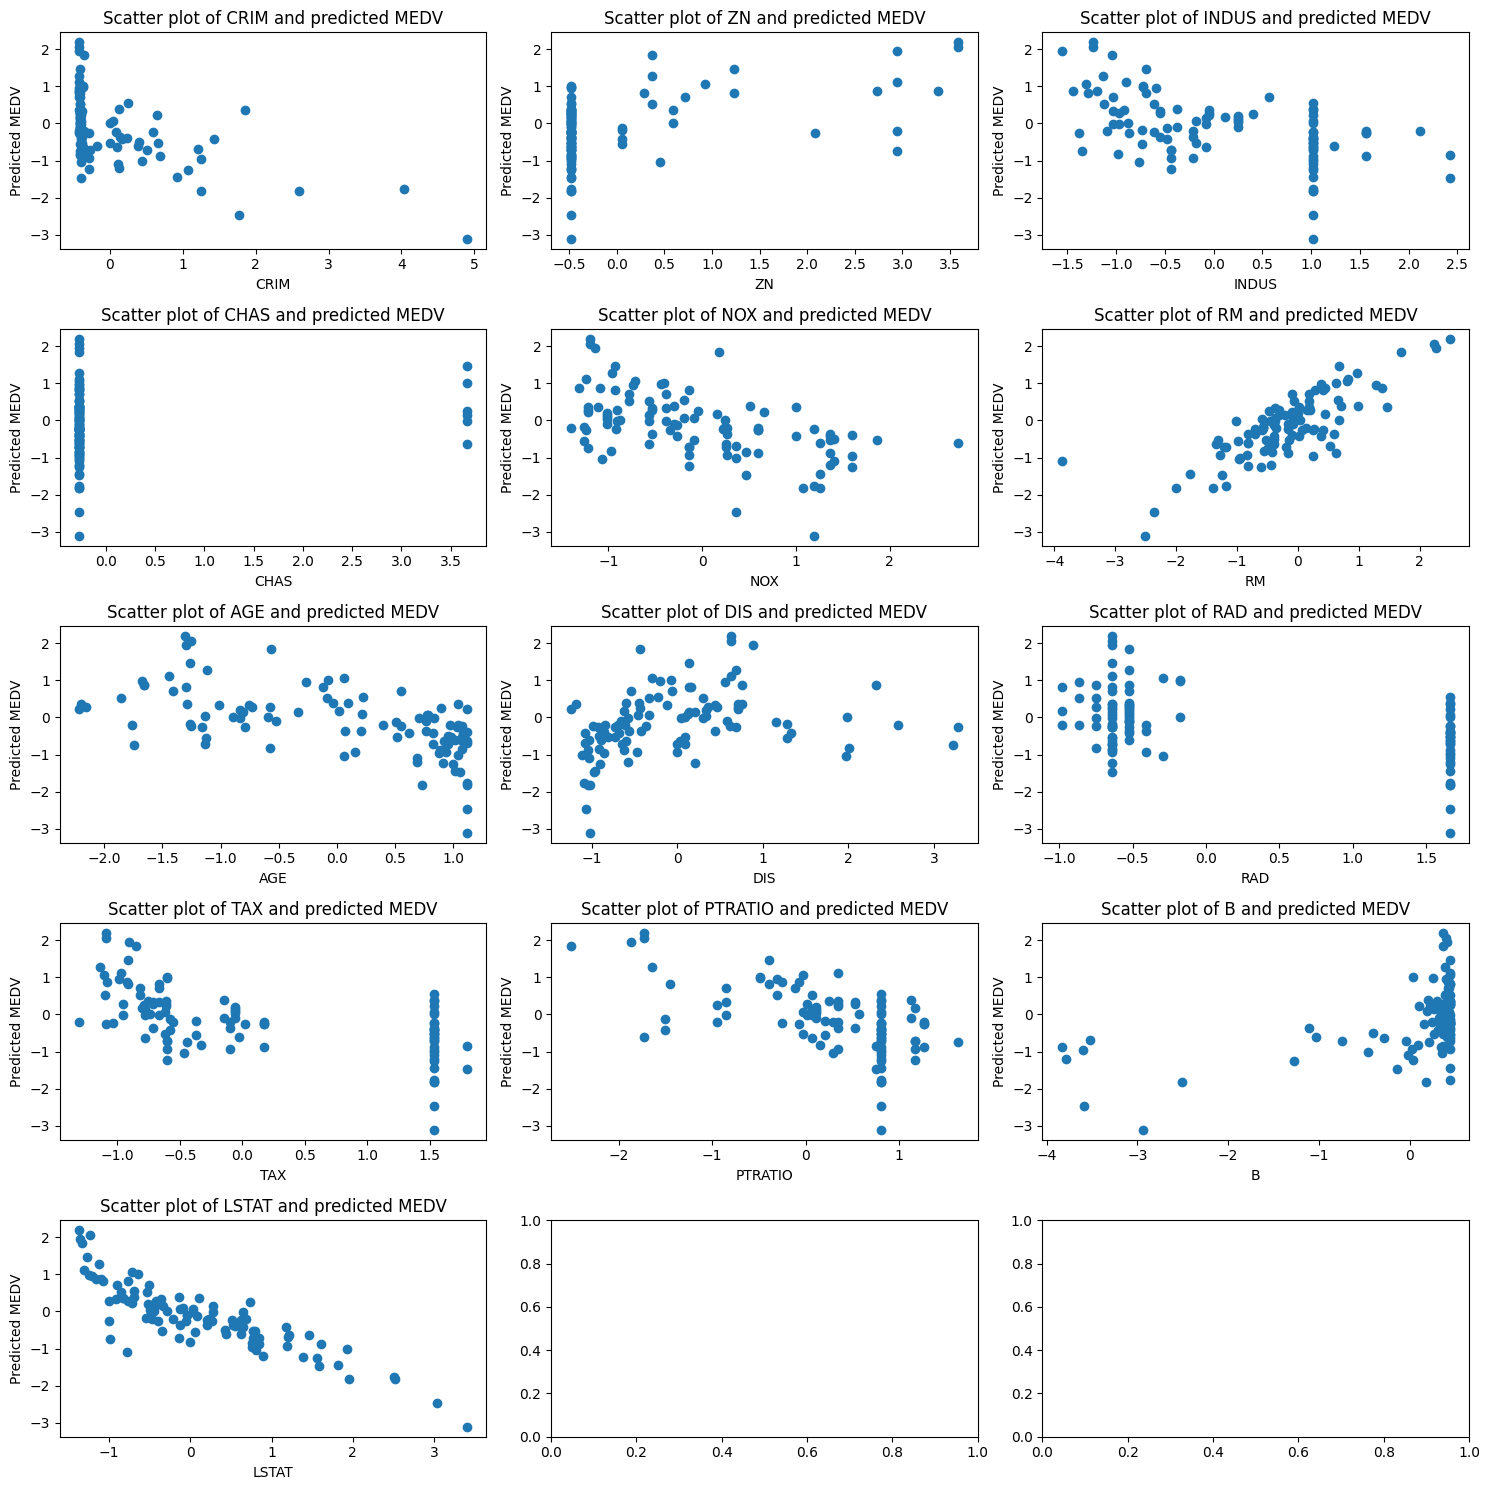

In [540]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
idx1=0
for idx, i in enumerate(column_names):

    if i == 'MEDV':
        continue
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    axes[row_idx, col_idx].scatter(X_test[i], predictions)
    axes[row_idx, col_idx].set_xlabel(i)
    axes[row_idx, col_idx].set_ylabel('Predicted MEDV')
    axes[row_idx, col_idx].set_title(f'Scatter plot of {i} and predicted MEDV')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

###Task 4

In [541]:
predictions = hypothesis(X_test, w1, b1)
mse = np.mean(np.square(predictions - y_test))
mae = np.mean(np.abs(predictions - y_test))

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.28720115087892245
Mean Absolute Error: 0.3467640907763955
